# Data Exploration

This is a notebook to explore the pickle files saved out by the `convert_data.py` script. We'll sanity check all the pickle files, by loading in the image files and displaying them with their labels.

In [1]:
# Load in dependencies, may not use all of these
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

%matplotlib inline

## Loading pickle files

The `convert_data.py` converts the ubyte format input files into numpy arrays.  These arrays are then saved out as pickle files to be quickly loaded later on. The shape of the numpy arrays for images and labels are:

* Images: (N, rows, cols)
* Labels: (N, 1)


In [2]:
# Set up the file directory and names
DIR = '../input/'
X_TRAIN = DIR + 'train-images-idx3-ubyte.pkl'
Y_TRAIN = DIR + 'train-labels-idx1-ubyte.pkl'
X_TEST = DIR + 't10k-images-idx3-ubyte.pkl'
Y_TEST = DIR + 't10k-labels-idx1-ubyte.pkl'

print('Loading pickle files')
X_train = pickle.load( open( X_TRAIN, "rb" ) )
y_train = pickle.load( open( Y_TRAIN, "rb" ) )
X_test = pickle.load( open( X_TEST, "rb" ) )
y_test = pickle.load( open( Y_TEST, "rb" ) )

n_train = X_train.shape[0]
n_test = X_test.shape[0]

print('Train images shape {}, labels shape {}'.format(X_train.shape, y_train.shape))
print('Test images shape {}, labels shape {}'.format(X_test.shape, y_test.shape))

Loading pickle files
Train images shape (60000, 28, 28), labels shape (60000, 1)
Test images shape (10000, 28, 28), labels shape (10000, 1)


## Sample training images with labels

Let's show a few of the training images with the corresponding labels, so we can sanity check that the labels match the numbers, and the images themselves look like actual digits.

Showing training image indexes [30318 25721  4848 20319 54974 43941 54933 49413 11574]


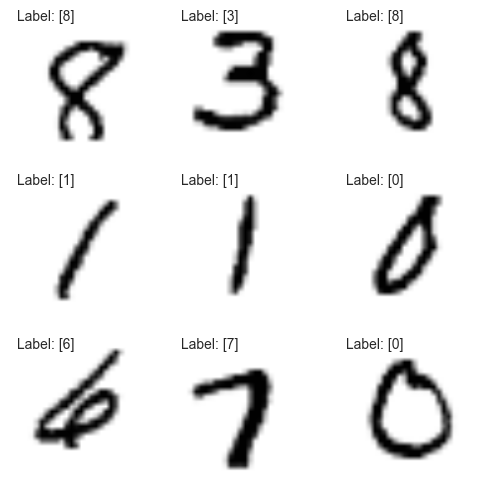

In [3]:
# Check a few training values at random as a sanity check
def show_label_images(X, y):
    '''Shows random images in a grid'''
    
    num = 9
    
    images = np.random.randint(0, X.shape[0], num)
    print('Showing training image indexes {}'.format(images))

    fig, axes = plt.subplots(3,3, figsize=(6,6))
    for idx, val in enumerate(images):
        r, c = divmod(idx, 3)
        axes[r][c].imshow(X[images[idx]])
        axes[r][c].annotate('Label: {}'.format(y[val]), xy=(1, 1))
        axes[r][c].xaxis.set_visible(False)
        axes[r][c].yaxis.set_visible(False)
        
show_label_images(X_train, y_train)

## Sample test images with labels

Now we can check the test images and labels by picking a few random ones, and making sure the images look reasonable and  they match their labels.

Showing training image indexes [3463 2696  653 3882 8771  209 2843  573 3393]


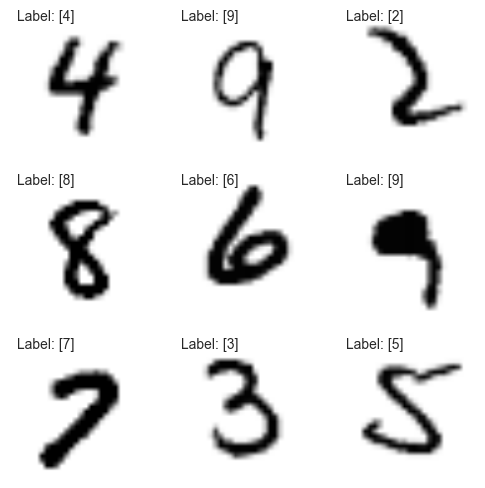

In [4]:
# Now do the same for the training dataset
show_label_images(X_test, y_test)

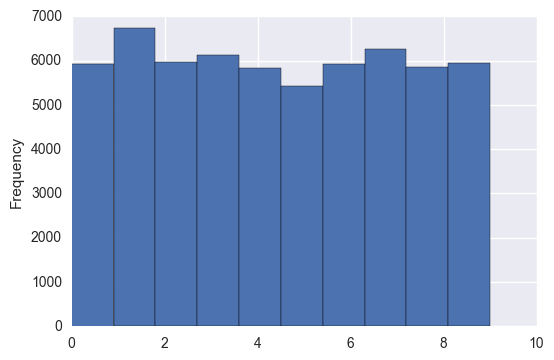

In [5]:
# # Training label distribution
y_train_df = pd.DataFrame(y_train, columns=['class'])
y_train_df.plot.hist(legend=False)
hist_df = pd.DataFrame(y_train_df['class'].value_counts(normalize=True))
hist_df.index.name = 'class'
hist_df.columns = ['train']

The class distribution is pretty evenly split between the classes. 1 is the most popular class with 11.24% of instances, and at the other end 5 is the least frequent class, with 9.04% of instances

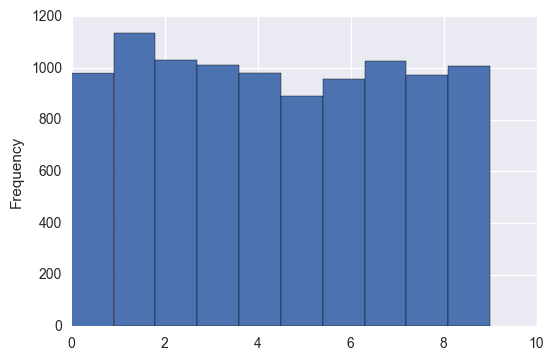

In [6]:
# Test label distribution
y_test_df = pd.DataFrame(y_test, columns=['class'])
y_test_df.plot.hist(legend=False, bins=10)
test_counts = y_test_df['class'].value_counts(normalize=True)
hist_df['test'] = test_counts

The distribution looks very similar between training and test datasets.

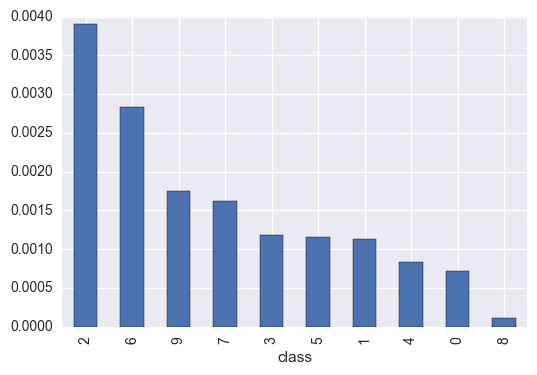

In [7]:
hist_df['diff'] = np.abs(hist_df['train'] - hist_df['test'])
hist_df.sort_values('diff', ascending=False)['diff'].plot.bar()

The largest difference is 0.0040% in the number 2 class.

In [8]:
# Final quick check of datatypes
assert X_train.dtype == np.uint8
assert y_train.dtype == np.uint8
assert X_test.dtype == np.uint8
assert y_test.dtype == np.uint8